In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn.apionly as sns

import composition.support_functions.paths as paths
from composition.support_functions.checkdir import checkdir
from composition.analysis.load_sim import load_sim
import composition.analysis.plotting_functions as plotting

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Load simulation and apply quality cuts

In [2]:
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IT_signal',
                     'StationDensity', 'max_charge_frac', 'reco_containment',
                     'min_energy', 'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

print('n_events before cuts = {}'.format(len(df)))
df = df[selection_mask]
print('n_events after cuts = {}'.format(len(df)))

/home/jbourbeau/composition/analysis/load_sim.py:65: RuntimeWarning: divide by zero encountered in log10
  # Add log-energy and log-charge columns to df
/home/jbourbeau/composition/analysis/load_sim.py:66: RuntimeWarning: invalid value encountered in log10
  df['MC_log_energy'] = np.nan_to_num(np.log10(df['MC_energy']))


n_events before cuts = 883119
n_events after cuts = 103778


In [3]:
MC_IT_containment = df.IceTop_FractionContainment
ShowerLLH_IT_containment = df.reco_IT_containment

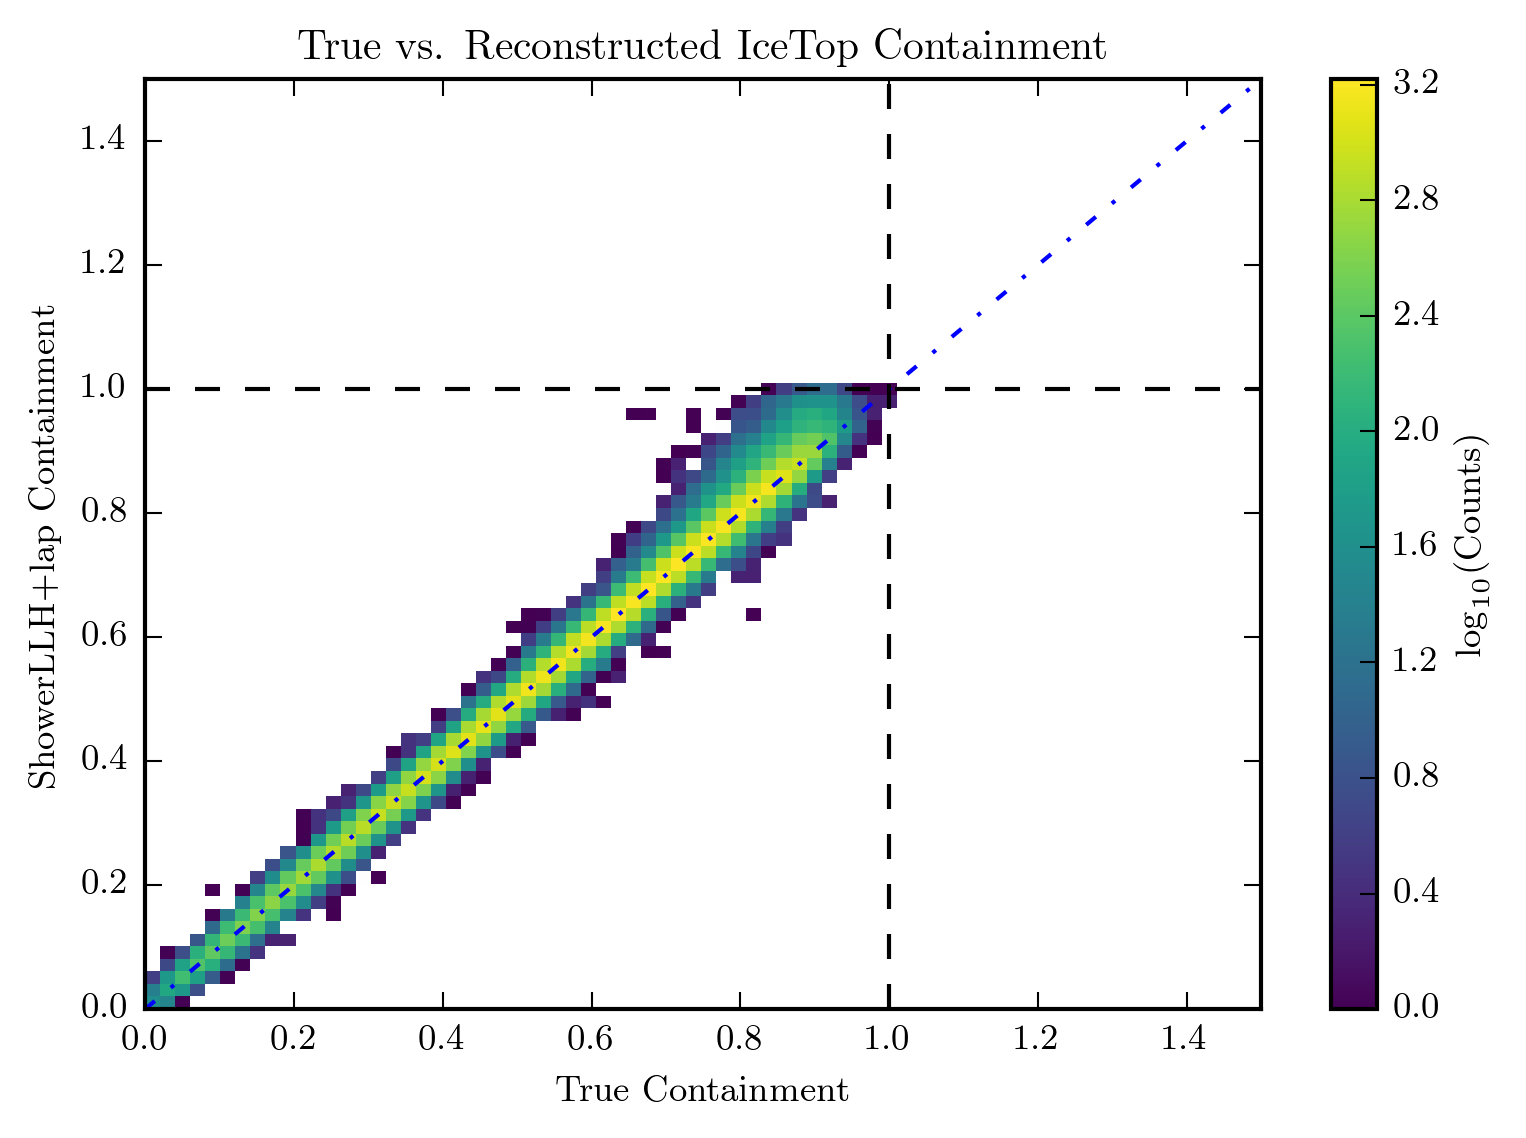

In [5]:
containment_bins = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
plotting.histogram_2D(MC_IT_containment, ShowerLLH_IT_containment, containment_bins, log_counts=True)
plt.plot([0,10], [0,10], marker='None', linestyle='-.')
plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
plt.xlim([0,1.5])
plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('ShowerLLH+lap Containment')
plt.title('True vs. Reconstructed IceTop Containment')
plt.show()

In [9]:
LLHlap_InIce_containment = df.LLHlap_InIce_containment

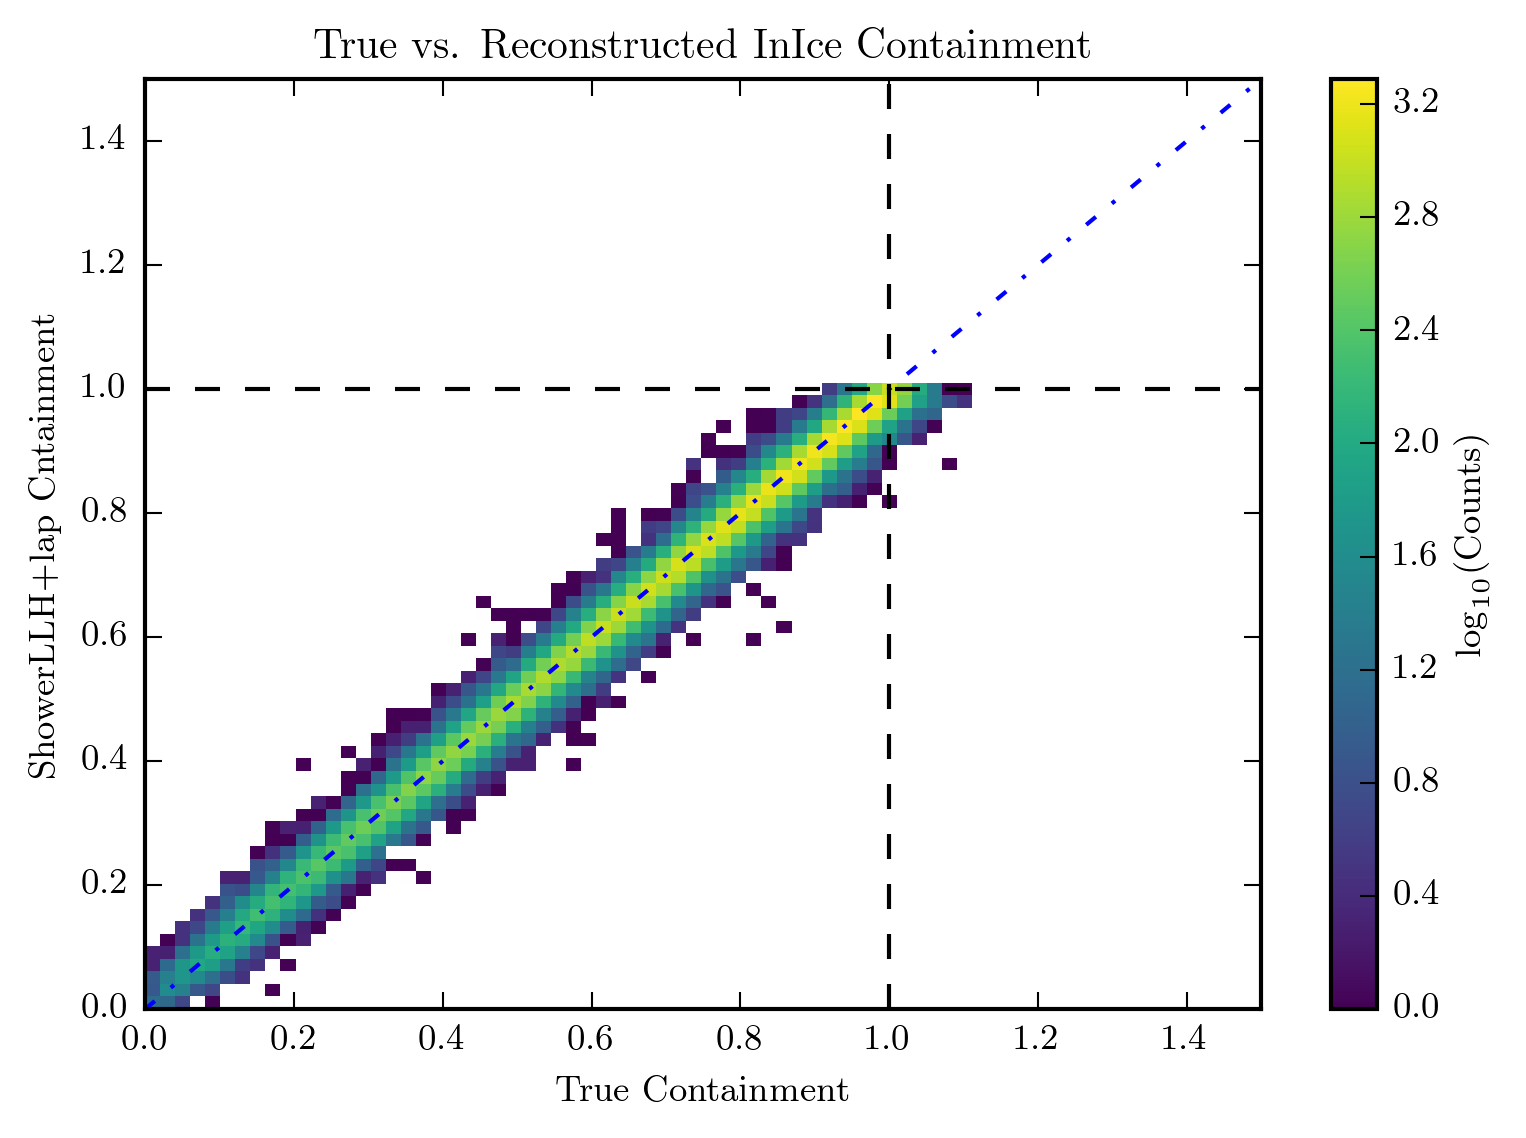

In [10]:
fig, ax = plt.subplots()
plotting.histogram_2D(MC_InIce_containment, LLHlap_InIce_containment, containment_bins, log_counts=True)
plt.plot([0,10], [0,10], marker='None', linestyle='-.')
plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
plt.xlim([0,1.5])
plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('ShowerLLH+lap Cntainment')
plt.title('True vs. Reconstructed InIce Containment')
plt.show()

In [7]:
MC_InIce_containment = df.InIce_FractionContainment
ShowerLLH_InIce_containment = df.reco_InIce_containment
uncontained_mask = (MC_InIce_containment > 1.0)
num_uncontained = len(ShowerLLH_InIce_containment[uncontained_mask])
print('Fraction of events uncontained = {}'.format(num_uncontained/len(ShowerLLH_InIce_containment)))

Fraction of events uncontained = 0.0251305671722


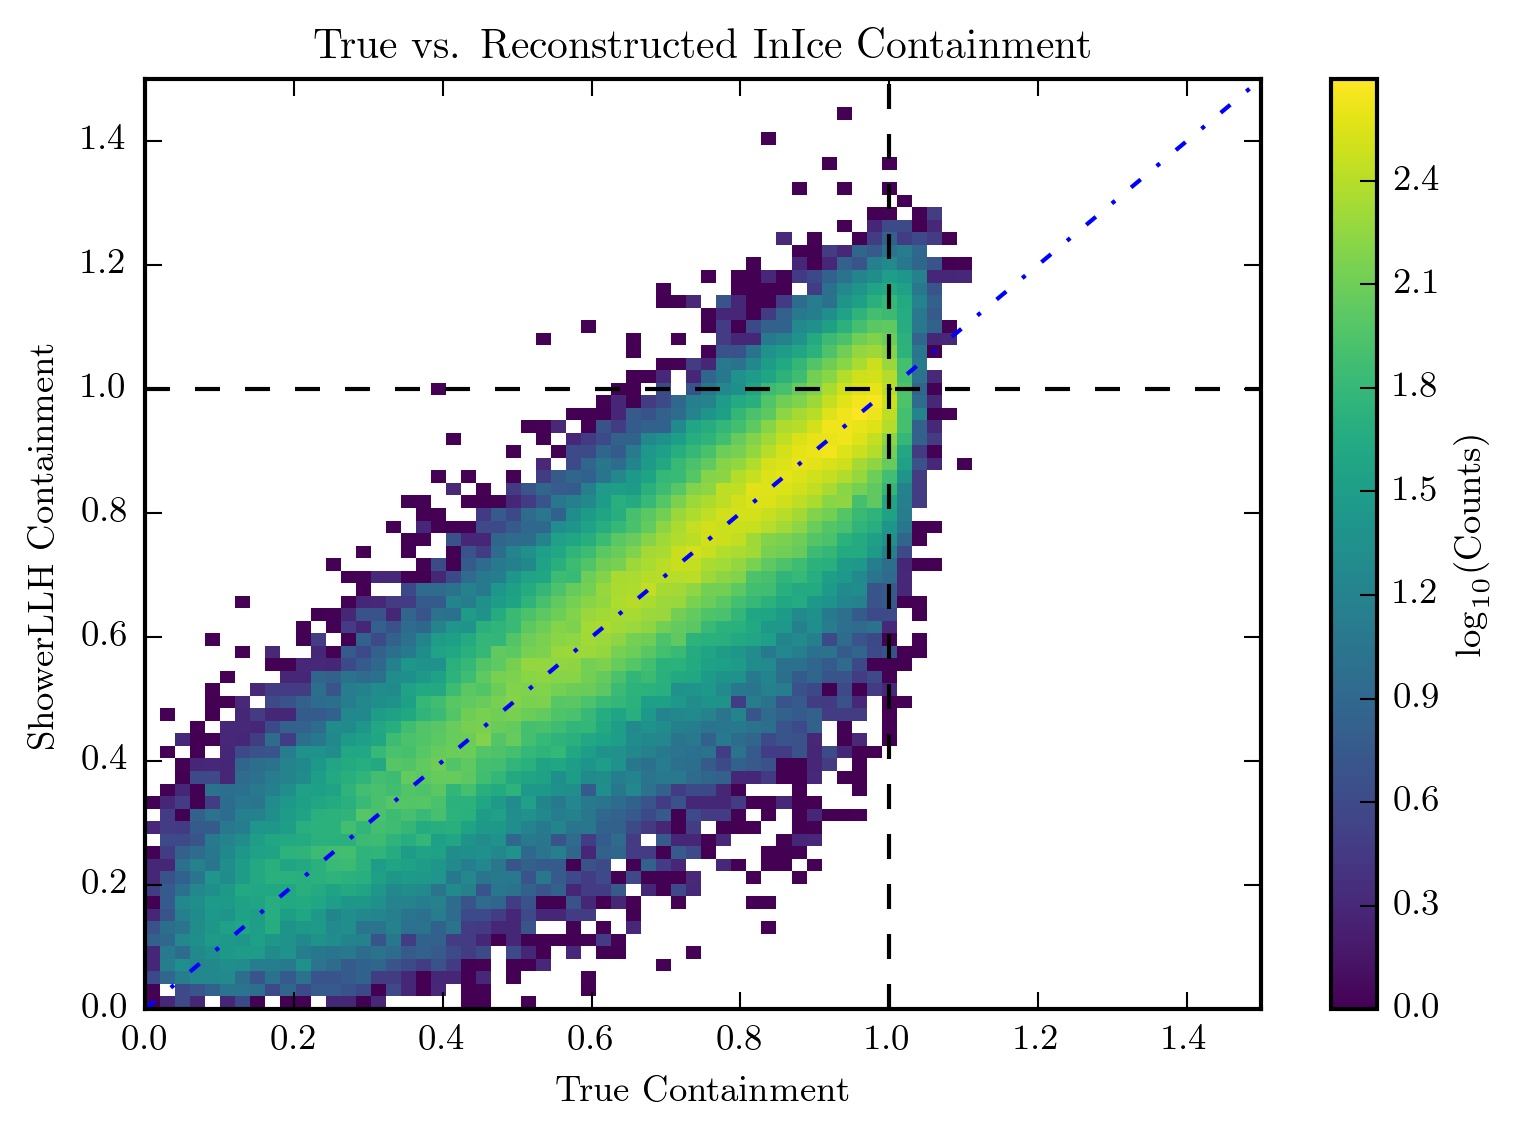

In [8]:
fig, ax = plt.subplots()
plotting.histogram_2D(MC_InIce_containment, ShowerLLH_InIce_containment, containment_bins, log_counts=True)
plt.plot([0,10], [0,10], marker='None', linestyle='-.')
plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
plt.xlim([0,1.5])
plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('ShowerLLH Containment')
plt.title('True vs. Reconstructed InIce Containment')
plt.show()

In [12]:
MC_InIce_containment = df.InIce_FractionContainment
ShowerLLH_InIce_containment = df.reco_InIce_containment

In [13]:
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith',
                     'num_hits', 'IT_signal','StationDensity', 'max_charge_frac',
                     'reco_IT_containment', 'reco_InIce_containment', 'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

print('n_events before cuts = {}'.format(len(df)))
df = df[selection_mask]
print('n_events after cuts = {}'.format(len(df)))

n_events before cuts = 883119
n_events after cuts = 105355


In [14]:
MC_InIce_containment = df.InIce_FractionContainment
ShowerLLH_InIce_containment = df.reco_InIce_containment

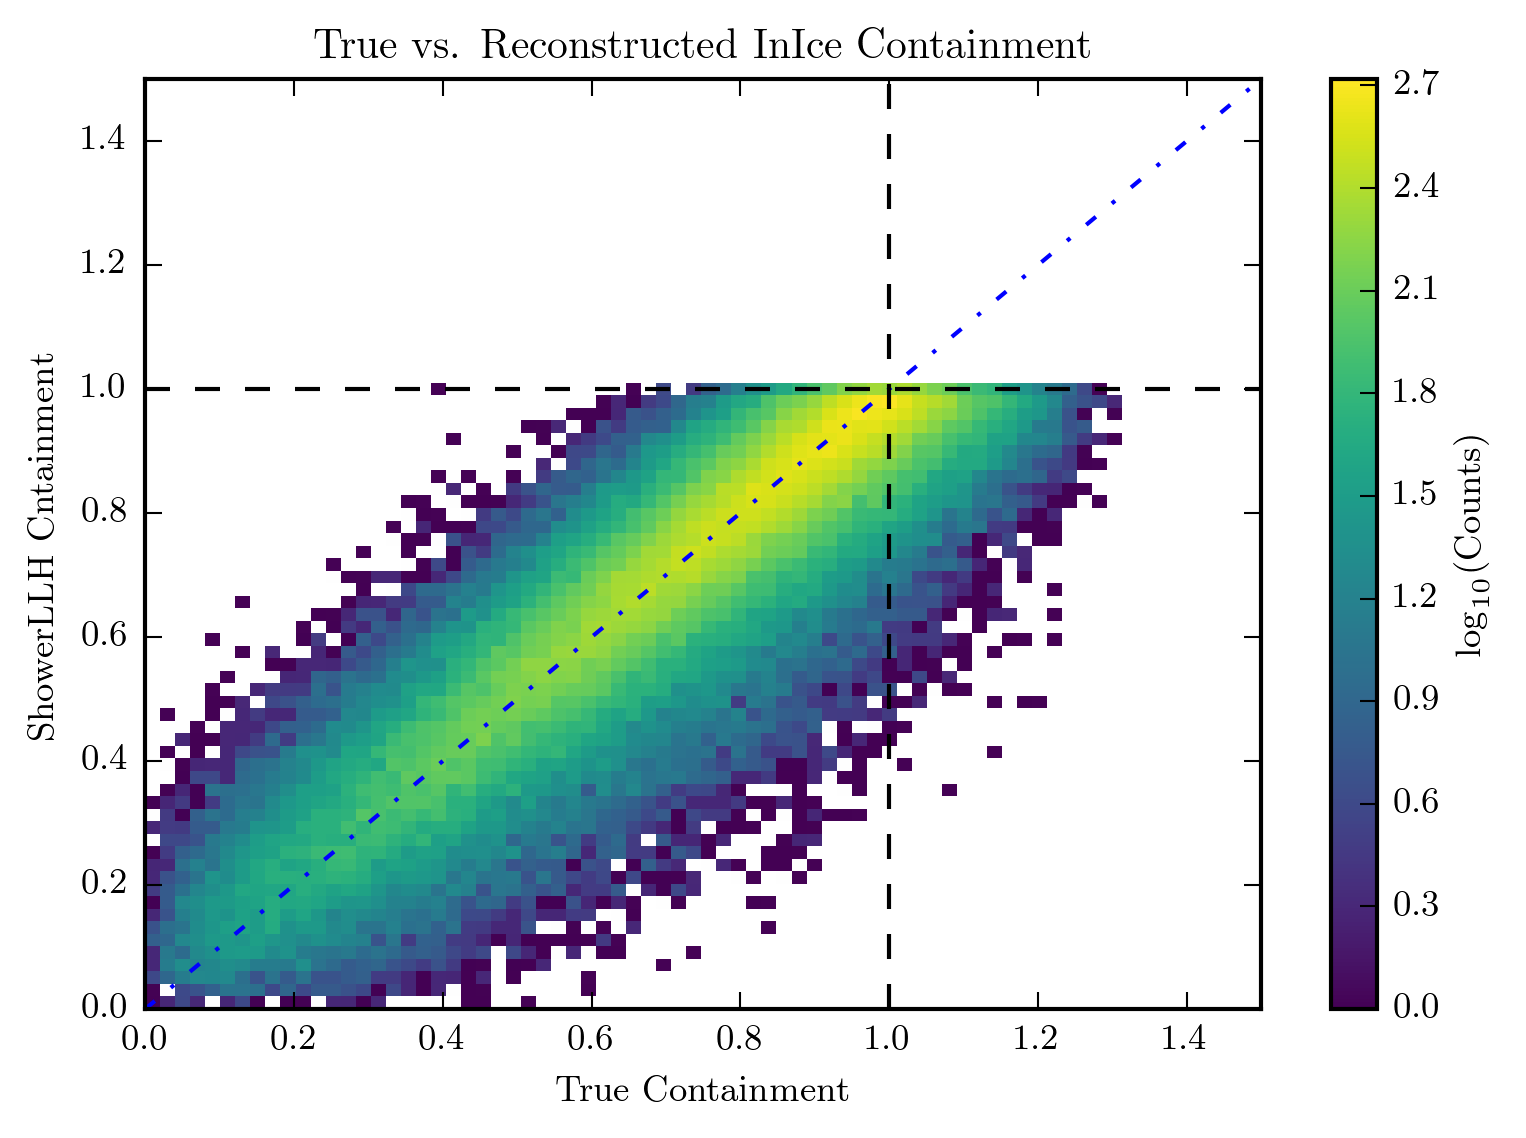

In [15]:
fig, ax = plt.subplots()
plotting.histogram_2D(MC_InIce_containment, ShowerLLH_InIce_containment, containment_bins, log_counts=True)
plt.plot([0,10], [0,10], marker='None', linestyle='-.')
plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
plt.xlim([0,1.5])
plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('ShowerLLH Cntainment')
plt.title('True vs. Reconstructed InIce Containment')
plt.show()